In [1]:
%matplotlib inline

# useful packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
import time
import pandas as pd

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit.quantum_info import Statevector
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import qiskit

In [10]:
# Cobyla(maxiter = 400)
seeds = np.linspace(201, 10000, 10000 - 200)
Energy = []
iterations = []
execution_time = []

In [11]:
for i in np.arange(1, 11):
    df = pd.read_excel('/Users/youfuqian/My Drive/College/#Research/3.MaxCut and statistical physics/2x2benchmarking/2x2 seeds ' + str(i) + '.xlsx')
    Energy += df['energy'].tolist()
    iterations += df['terminate iterations'].tolist()
    execution_time += df['time (s)'].tolist()

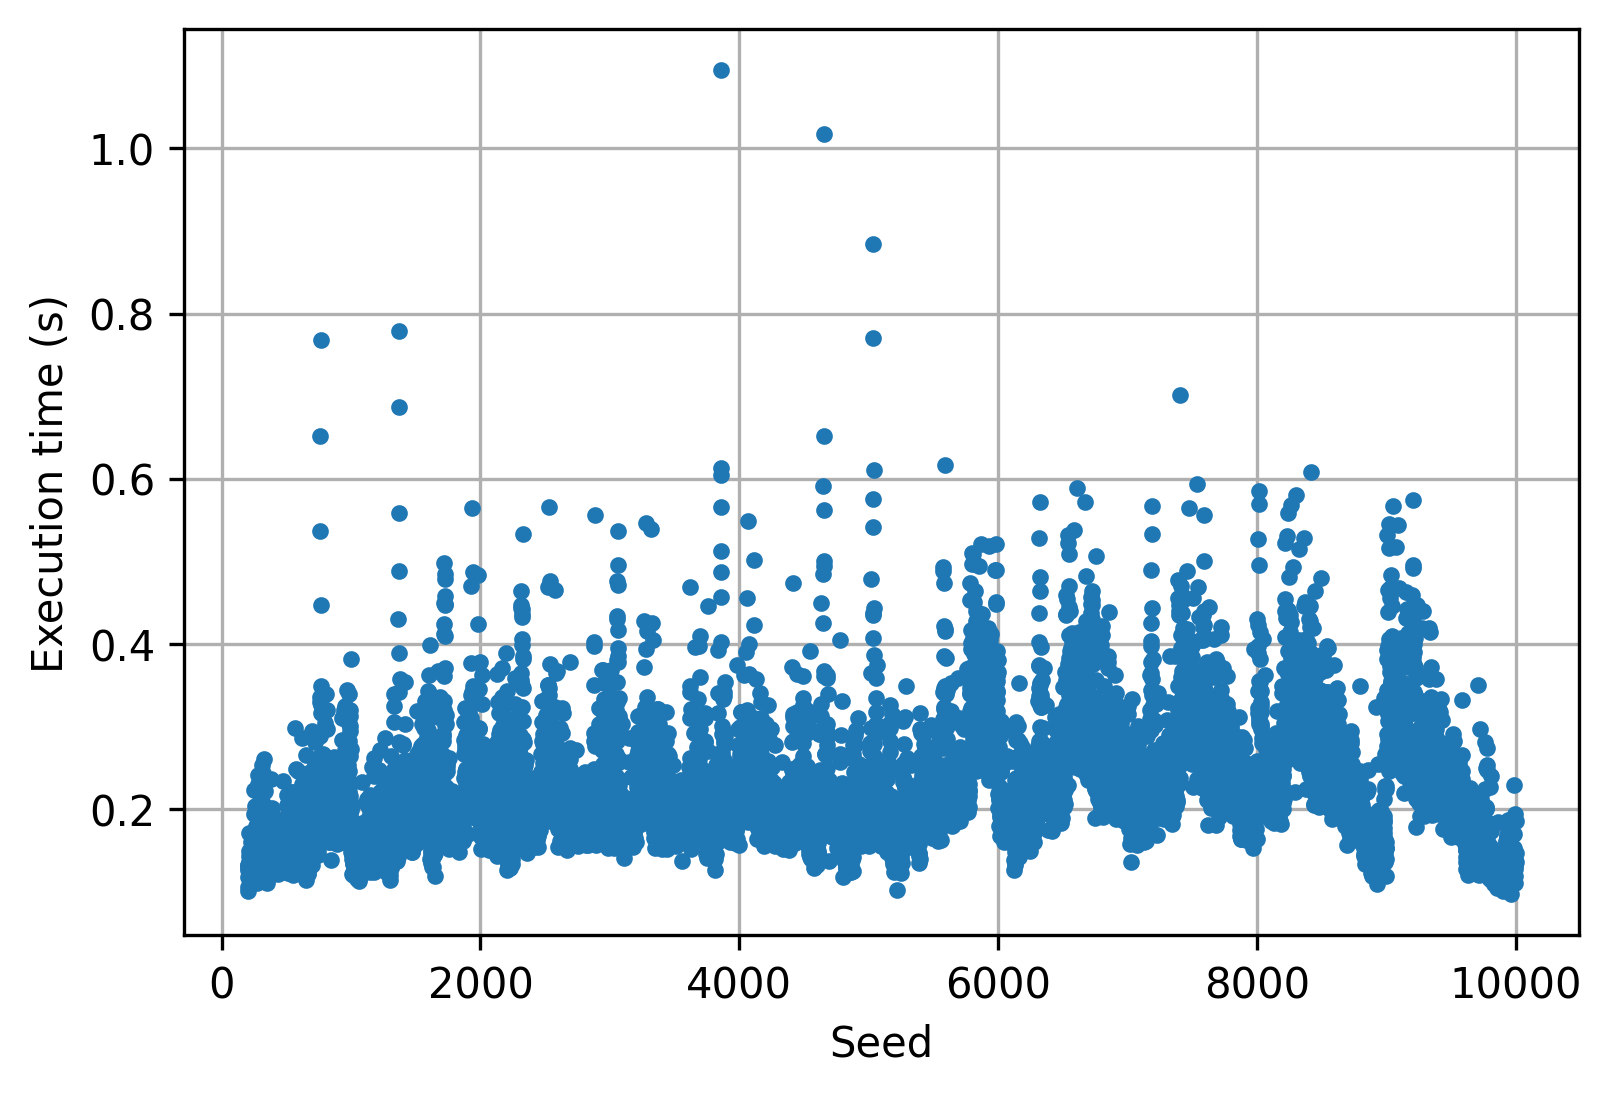

In [12]:
# seed v.s. execution time
plt.figure(dpi = 300)
plt.plot(seeds, execution_time, '.')
plt.xlabel('Seed')
plt.ylabel('Execution time (s)')
plt.grid()
plt.show()

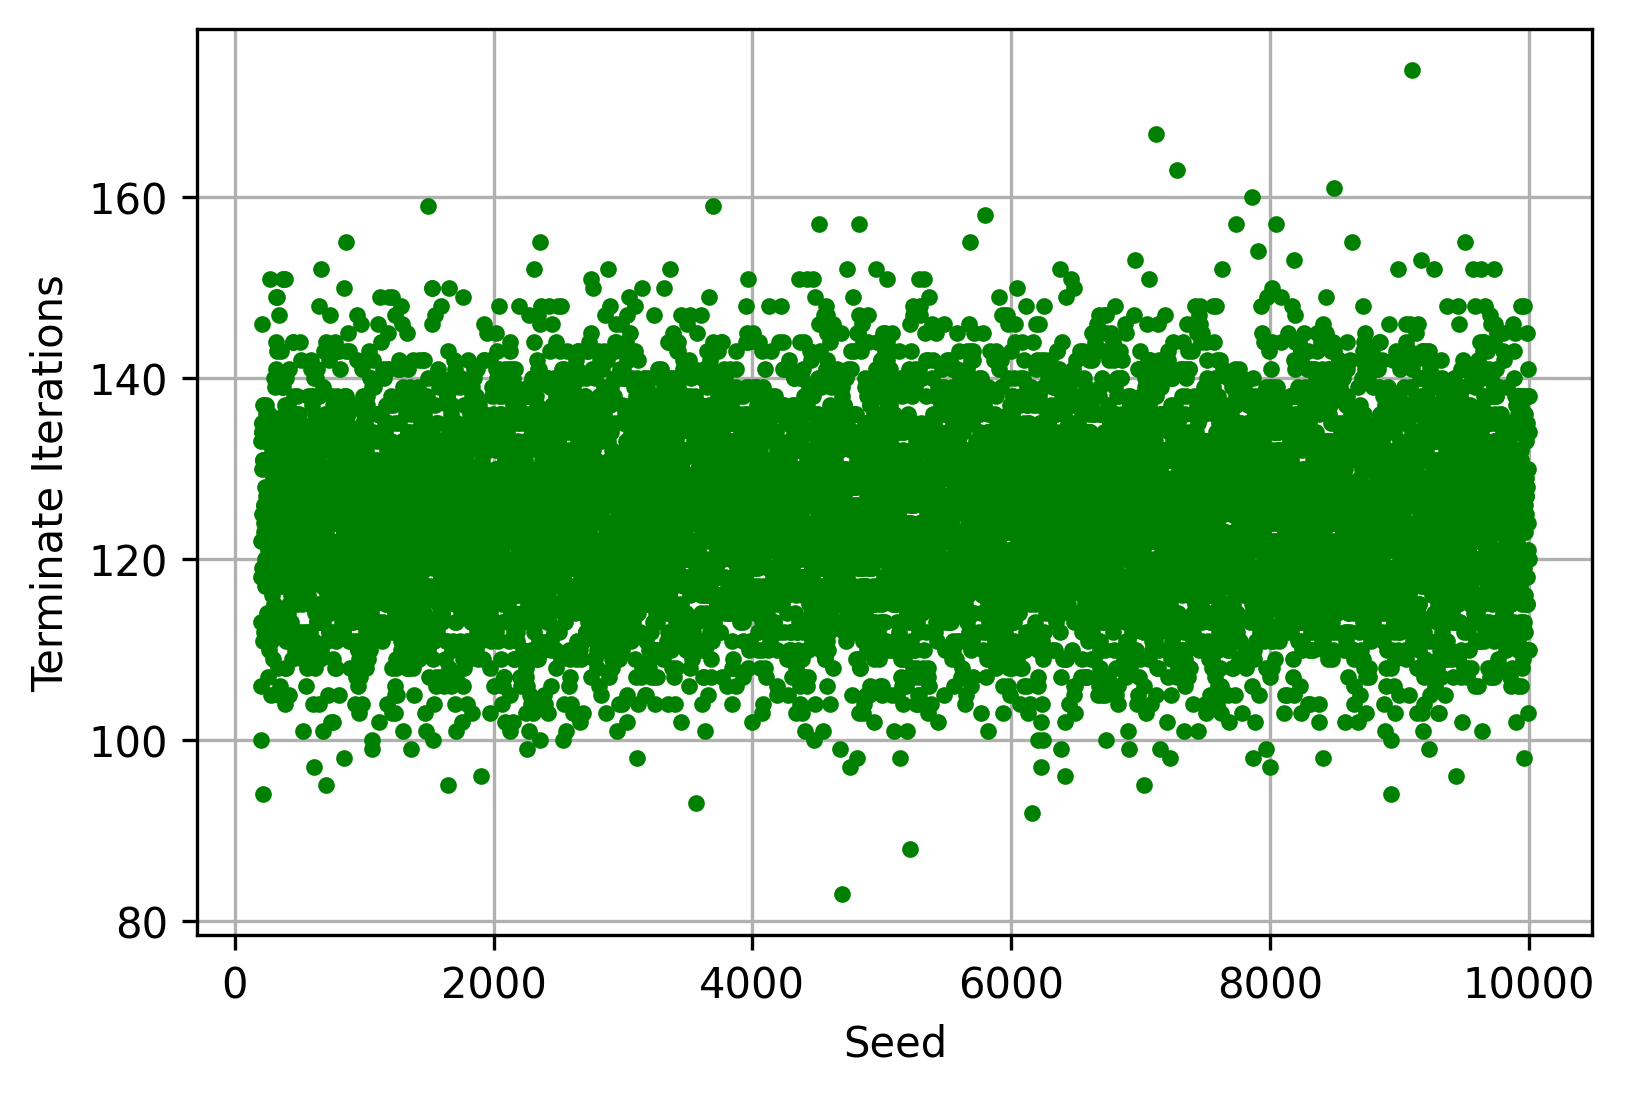

In [14]:
# seed v.s. iterations
plt.figure(dpi = 300)
plt.plot(seeds, iterations, 'g.')
plt.xlabel('Seed')
plt.ylabel('Terminate Iterations')
plt.grid()
plt.show()

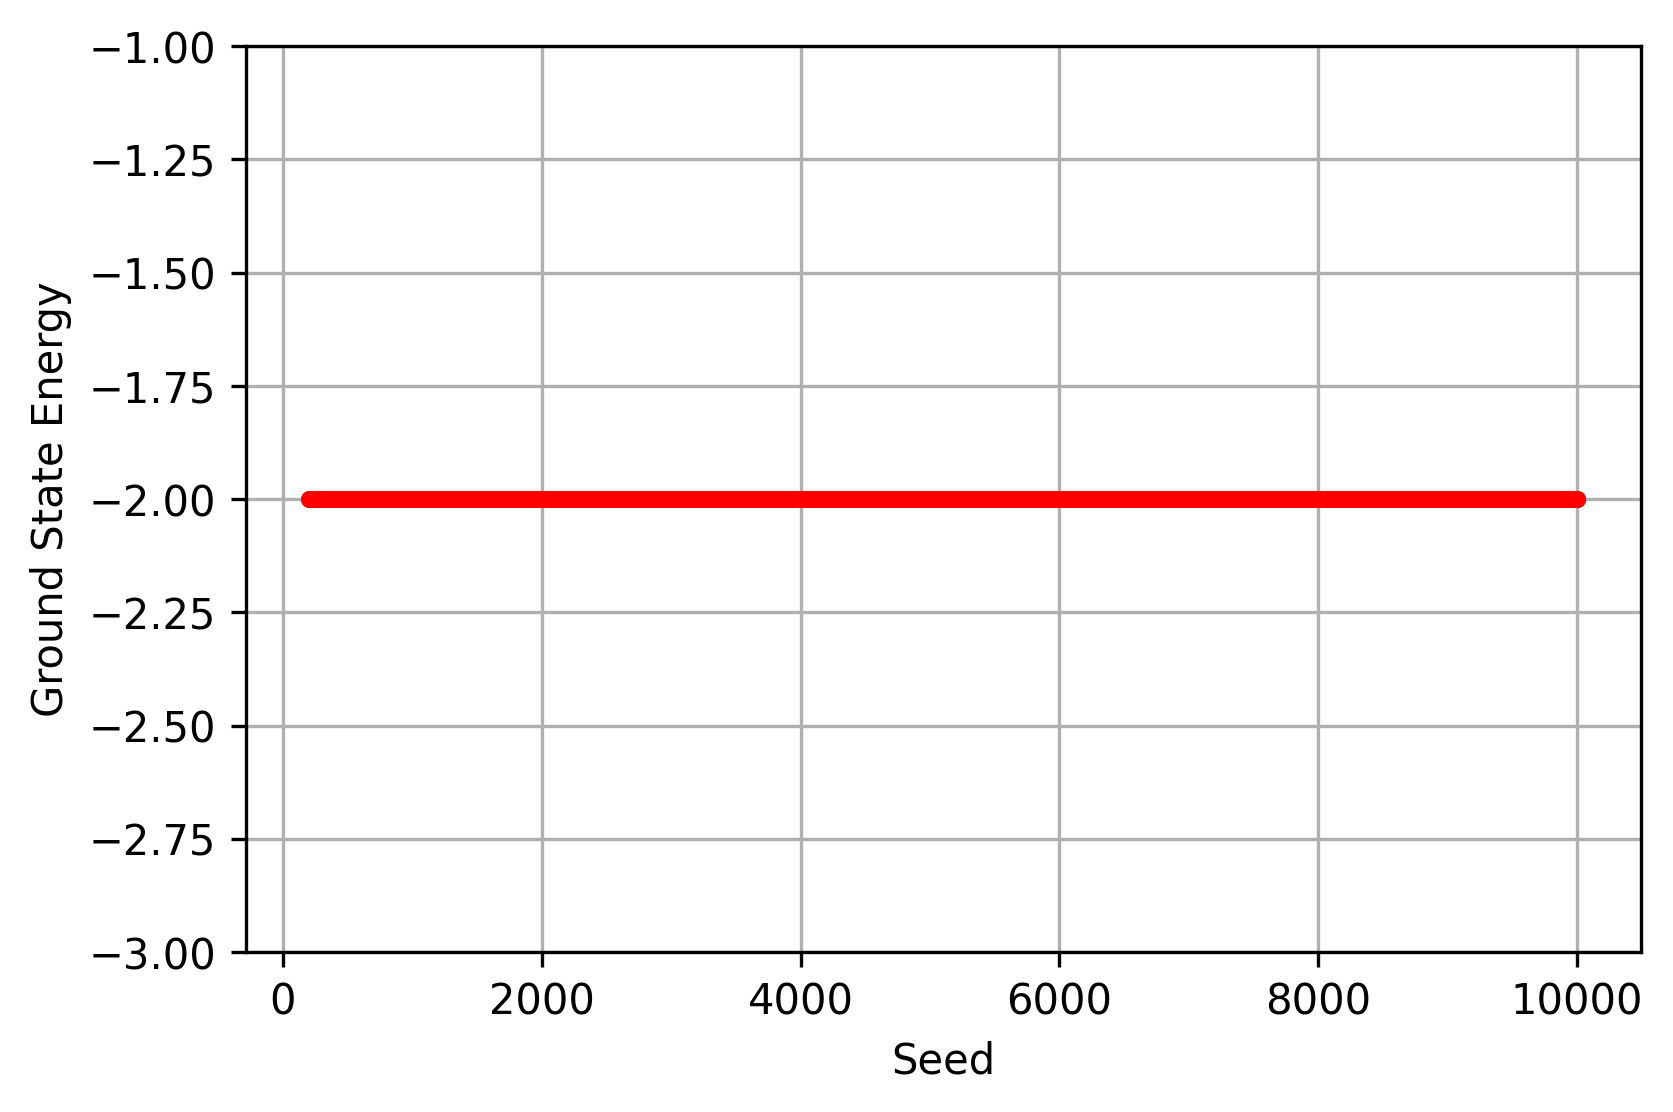

In [18]:
# seeds v.s. energy
plt.figure(dpi = 300)
plt.plot(seeds, Energy, 'r.')
plt.xlabel('Seed')
plt.ylim(-3, -1)
plt.ylabel('Ground State Energy')
plt.grid()
plt.show()

In [16]:
Energy

[-1.999999998609849,
 -1.999999995697423,
 -1.99999999594135,
 -1.999999986455645,
 -1.9999999968821,
 -1.999999996089994,
 -1.999999991627359,
 -1.999999998193214,
 -1.999999986974825,
 -1.99999999071361,
 -1.999999995239633,
 -1.999999998094861,
 -1.999999994279793,
 -1.99999999490328,
 -1.999999988382736,
 -1.999999990798194,
 -1.999999995917233,
 -1.999999993091647,
 -1.999999987061461,
 -1.99999999685697,
 -1.999999993555993,
 -1.999999997927607,
 -1.999999988563684,
 -1.999999989653749,
 -1.999999984861937,
 -1.999999991747655,
 -1.999999991753712,
 -1.999999998144343,
 -1.999999990770077,
 -1.999999994877593,
 -1.999999992882898,
 -1.999999994847659,
 -1.999999998725882,
 -1.99999999008134,
 -1.999999986497823,
 -1.999999992069693,
 -1.999999990792248,
 -1.999999999128976,
 -1.999999995915956,
 -1.999999984771274,
 -1.999999987244795,
 -1.999999997793478,
 -1.999999998279591,
 -1.999999994436405,
 -1.999999988266213,
 -1.999999991633099,
 -1.999999997307813,
 -1.999999999456743,